In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mall = pd.read_csv('Mall_Customers.csv')

In [4]:
mall.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## KMeans Clustering

In [9]:
imp_features = ['Annual Income (k$)', 'Spending Score (1-100)']
data = mall[imp_features]

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, random_state = 22)
mall['cluster'] = kmeans.fit_predict(data)
mall.head(20)

c:\Users\Jakkala\anaconda3\envs\ml-env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4
5,6,Female,22,17,76,0
6,7,Female,35,18,6,4
7,8,Female,23,18,94,0
8,9,Male,64,19,3,4
9,10,Female,30,19,72,0


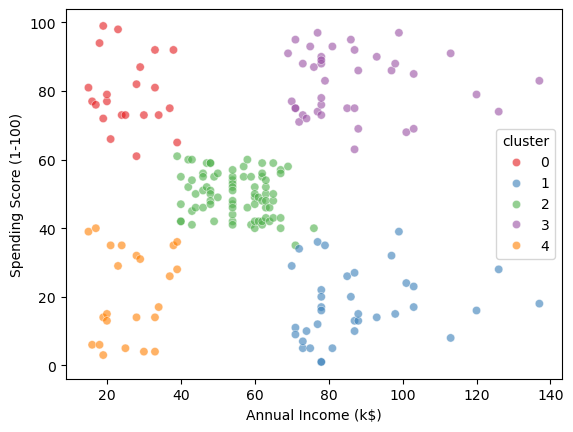

In [22]:
# visualizing using 

sns.scatterplot(data = mall, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster', palette = 'Set1', alpha = 0.6)
plt.show()

In [ ]:
# cluster 0 - Low Income, spends more
# cluster 4 - Low Income, spends less
# cluster 2 - Medium income, spends average
# cluster 1 - High Income, spends less
# cluster 3 - High income, spends more

In [27]:
mall.groupby('cluster')[['Age']].describe()

Age                                                      
        count       mean        std   min    25%   50%    75%   max
cluster                                                            
0        22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0
1        36.0  40.666667  11.496583  19.0  34.00  41.5  47.25  59.0
2        80.0  42.937500  16.429630  18.0  27.00  46.5  54.25  70.0
3        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0
4        23.0  45.217391  13.228607  19.0  35.50  46.0  53.50  67.0

In [ ]:
# most of the youth with low earnings are spending a lot of mone in malls
# highest number of people fall in cluster 2

## Hierarchical Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 5)
mall['cluster_agg'] = agg.fit_predict(data)
mall.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_agg
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,4,4
5,6,Female,22,17,76,0,3
6,7,Female,35,18,6,4,4
7,8,Female,23,18,94,0,3
8,9,Male,64,19,3,4,4
9,10,Female,30,19,72,0,3


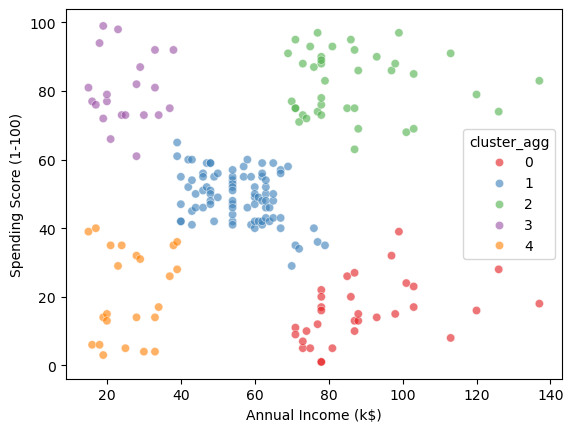

In [30]:
sns.scatterplot(data = mall, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_agg', palette = 'Set1' ,alpha = 0.6)
plt.show()

### Dendrogram

In [34]:
mall.shape

(200, 7)

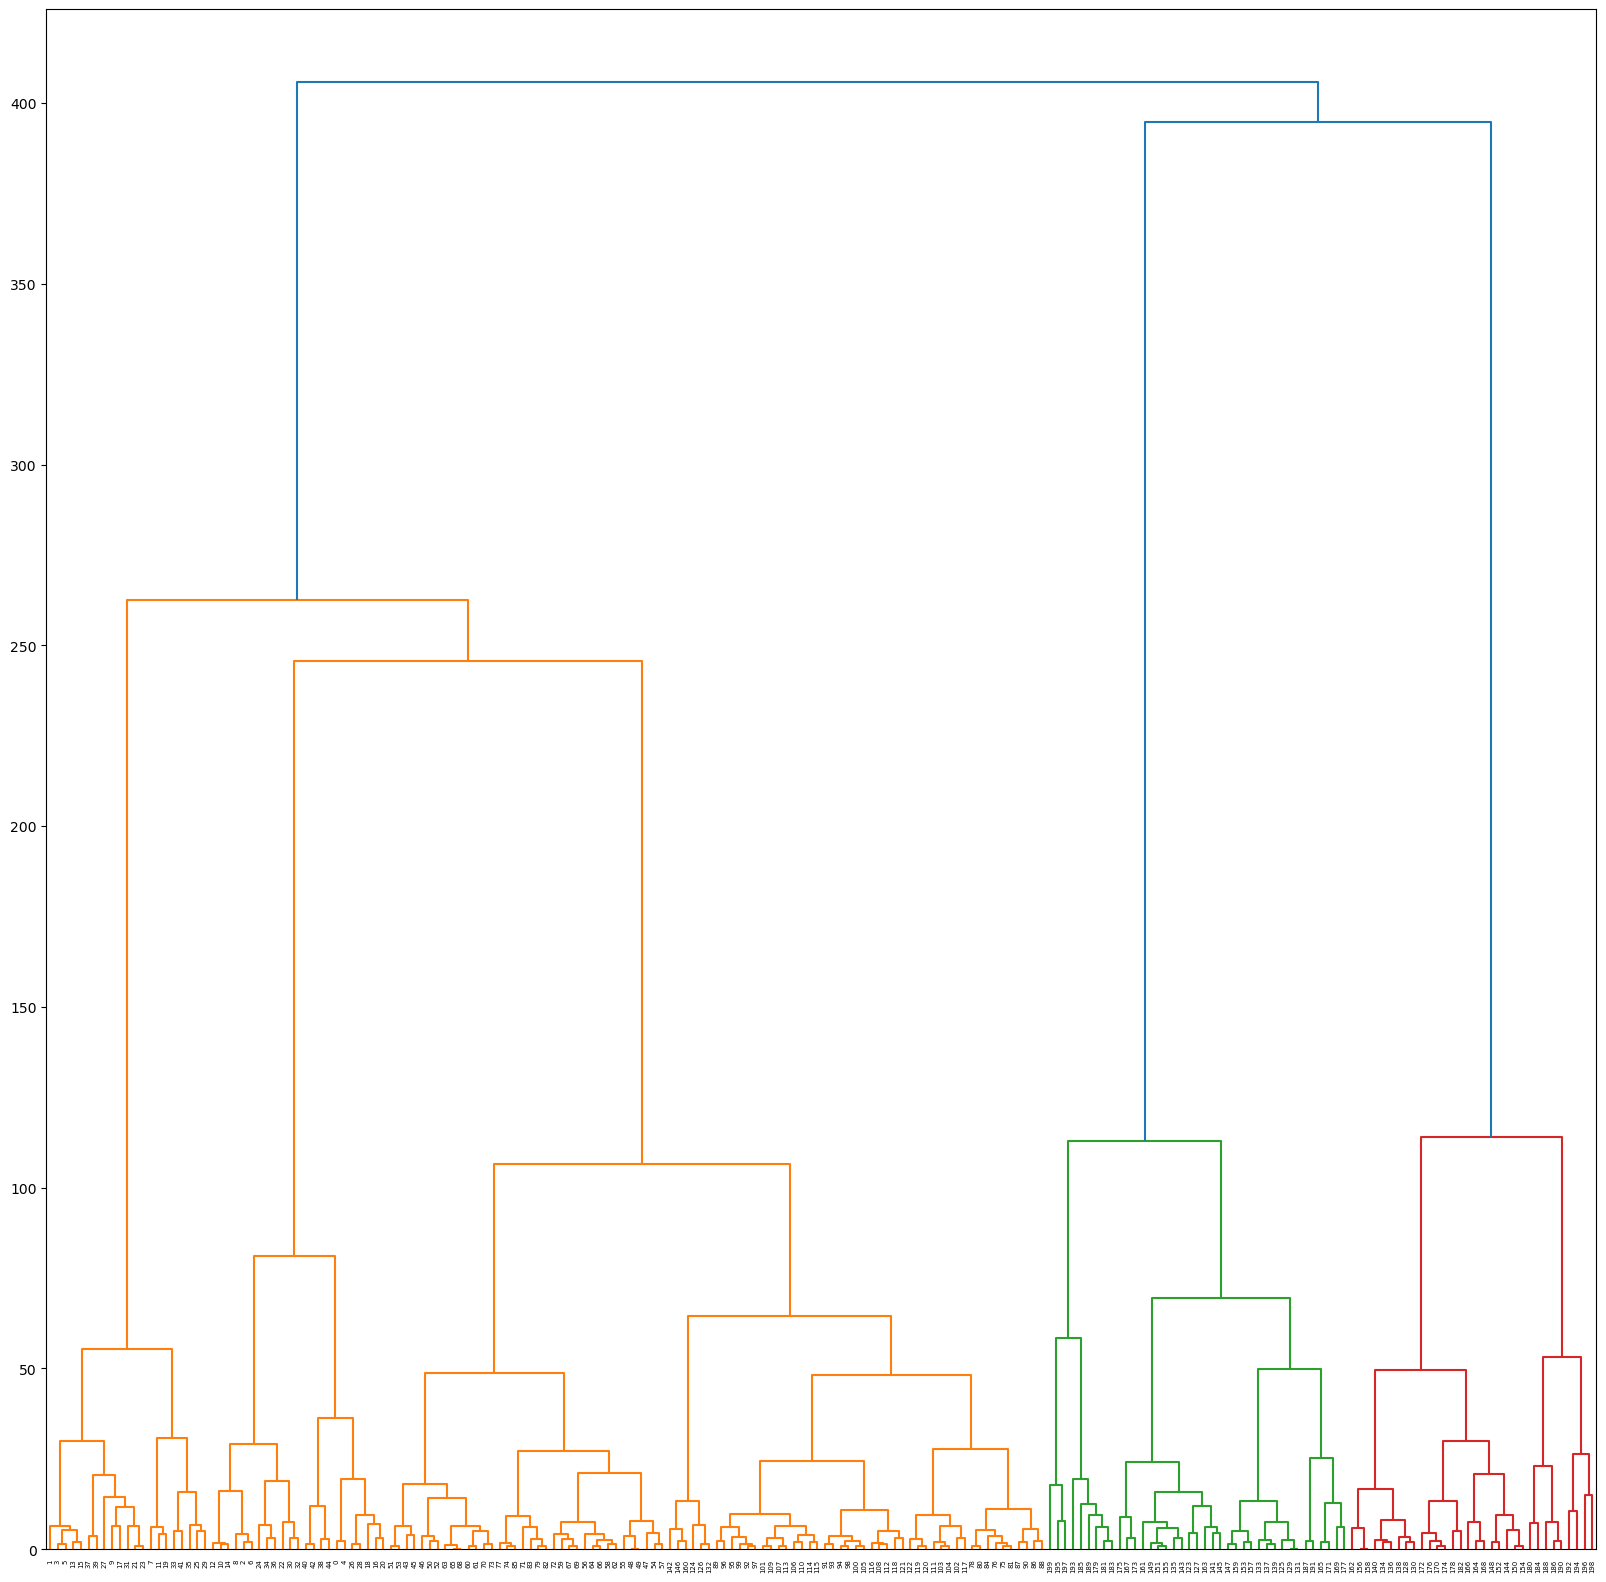

In [32]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, method = 'ward')

plt.figure(figsize = (20,20))
dendrogram(linked)
plt.show()

## DBSCAN

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# standardizing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
dbscan = DBSCAN(eps = 0.5, min_samples = 5)
data['cluster_dbscan'] = dbscan.fit_predict(data_scaled)

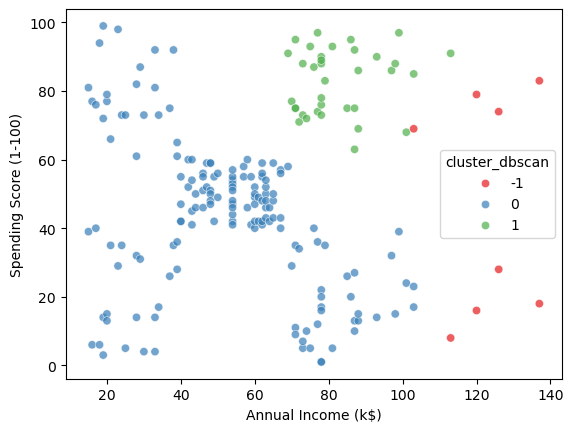

In [41]:
sns.scatterplot(data = mall, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'cluster_dbscan', palette = 'Set1', alpha = 0.7)

plt.show()